In [1]:
# import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

# Dataset
- We can reach the data with wget from the below link:
`https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv` 

# Goal of the homework
- To create a regression model for predicting car fuel efficiency

# Gathering data

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv 

--2025-10-08 03:48:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-10-08 03:48:02 (152 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [2]:
# read the csv file
df = pd.read_csv('../02 - regression/car_fuel_efficiency.csv')

# shows the all records file
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


# Preparing the dataset
Use only the following columns: 
- `'engine_displacement`
- `'horsepower'`
- `'vehicle_weight'`
- `'model_year'`
- `'fuel_efficiency_mpg'`

In [3]:
# selected the columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

# show the new data
df = df[columns]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


# EDA
- Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

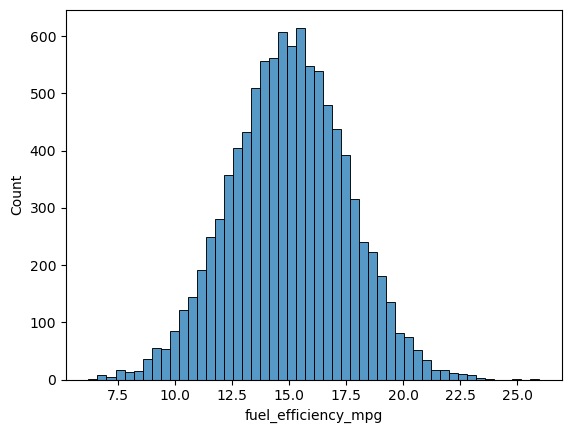

In [4]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

- From the distribution, `fuel_efficiency_mpg` is not include as a long-tail distribution. It's the normal distribution cause it have nice bell curve from the data.

# Q1. Check missing values
- There's one column with missing values. What is it?

In [5]:
# check missing values 
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [6]:
# answer the question no.1
print("The `horsepower` column has missing values.")

The `horsepower` column has missing values.


# Q2. Median
What's the median (50% percentile) for variable `'horsepower'`?

In [7]:
# use the median function
horsepower_median = df['horsepower'].median()

horsepower_median

149.0

In [8]:
# answer the question no.2
print('The median value of the horsepower column is', horsepower_median)

The median value of the horsepower column is 149.0


# Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with `60%/20%/20%` distribution.

In [9]:
# set number seed is 42
np.random.seed(42)

# Split data formula
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train+n_val+n_test

# make a shuffle data
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# separate data into data training, validation and test. 
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:]

In [10]:
# fuel_efficiency_mpg is our target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


In [11]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [12]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419
...,...,...,...,...,...
7802,290,205.0,3403.401496,2019,13.868607
6780,200,159.0,2752.516039,2009,15.665403
7541,230,202.0,3303.000688,2008,13.613127
1577,220,169.0,3293.420251,2008,13.733343


In [13]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [14]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

In [15]:
y_val

array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
       13.73334321, 15.81604972])

In [16]:
y_test

array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
       20.50246014, 16.81624056])

# Q3. Treatment
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`.
- Which option gives better RMSE?

In [17]:
# check the missing values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [18]:
df_train.iloc[:,:-1]

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014
6735,210,152.0,2500.175687,2020
2052,250,154.0,2254.313245,2002


In [19]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [20]:
columns

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [21]:
df_train.iloc[:,-1]

483     16.642943
7506    16.298377
8795    18.591822
1688    11.818843
6217    19.402209
          ...    
1696    16.964054
5685    10.059094
6735    17.593237
2052    18.925748
1776    17.965284
Name: fuel_efficiency_mpg, Length: 5824, dtype: float64

- handling missing values using zero values

In [22]:
def prepare_X(df):
  predictor_var = df.iloc[:, :-1]
  predictor_var[columns[1]] = df[columns[1]].fillna(0)
  X = predictor_var.values
  return X

In [23]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  
  return w[0], w[1:]

In [24]:
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [25]:
# X_train
X_train = prepare_X(df_train)

# linear regression model
w_0, w = train_linear_regression(X_train, y_train)

# y_pred in data training
y_pred_train = w_0 + X_train.dot(w)

# prepare data validation
X_val = prepare_X(df_val)

# y_pred in data validation
y_pred_val = w_0 + X_val.dot(w)

In [26]:
print('w0\t: ', w_0)
print('w\t: ', w)
print('y_pred_train\t: ', y_pred_train)
print('y_pred_val\t: ', y_pred_val)

w0	:  28.82736547470504
w	:  [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]
y_pred_train	:  [17.33526223 16.29296317 17.69885099 ... 17.54541307 18.78287539
 17.86564842]
y_pred_val	:  [16.0373382  14.92522236 11.86445895 ... 13.69560868 13.62575126
 16.44936805]


In [27]:
rmse_training = rmse(y_train, y_pred_train)
rmse_validation = rmse(y_val, y_pred_val)

print('RMSE score with zero values')
print('train\t\t: ', round(rmse_training,2))
print('validation\t: ', round(rmse_validation,2))

RMSE score with zero values
train		:  0.52
validation	:  0.52


- handling missing values using mean

In [28]:
def prepare_Xtrain_mean(df):
  predictor_var = df.iloc[:, :-1]
  mean_values = predictor_var[columns[1]].mean()
  predictor_var[columns[1]] = df[columns[1]].fillna(mean_values)
  X = predictor_var.values
  return X
  

In [29]:
# X_train mean
X_train_mean = prepare_Xtrain_mean(df_train)

# linear regression model
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# y_pred in data training
y_pred_train_mean = w_0_mean + X_train_mean.dot(w_mean)

# X validation 
X_val_mean = prepare_X(df_val)

# y_pred in data validation
y_pred_val_mean = w_0_mean + X_val_mean.dot(w_mean)

In [30]:
print('w0\t: ', w_0)
print('w\t: ', w)
print('y_pred_train\t: ', y_pred_train_mean)
print('y_pred_val\t: ', y_pred_val_mean)

w0	:  28.82736547470504
w	:  [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]
y_pred_train	:  [17.25910991 16.1901126  17.6924588  ... 17.51666431 18.77812427
 17.84593445]
y_pred_val	:  [15.73837497 14.80338305 12.03624928 ... 14.01482574 13.72161355
 16.1936294 ]


In [31]:
rmse_training_mean = rmse(y_train, y_pred_train_mean)
rmse_validation_mean = rmse(y_val, y_pred_val_mean)

print('RMSE score with mean ')
print('train\t\t: ', round(rmse_training_mean,2))
print('validation\t: ', round(rmse_validation_mean,2))

RMSE score with mean 
train		:  0.46
validation	:  0.61


# Q4 Regularization

In [32]:
# linear regression regularization function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
# X_train
X_train = prepare_X(df_train)
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]])

In [34]:
# show regularization, w_0 and w value
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  print('%2s, %.2f, %.2f, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[1], w[2], w[3]))

 0, 28.83, 0.00, 0.00, -0.01, 0.00
0.01, 24.93, 0.00, 0.00, -0.01, 0.00
0.1, 11.24, 0.00, 0.00, -0.01, 0.01
 1, 1.73, 0.00, 0.00, -0.01, 0.01
 5, 0.36, 0.00, 0.00, -0.01, 0.01
10, 0.18, 0.00, 0.00, -0.01, 0.01
100, 0.02, 0.00, 0.00, -0.01, 0.01


In [35]:
# prepare X in trianing and validataion data
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# show regularization and rmse 
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  print('%2s' % r, round(rmse(y_val, y_pred),2))

 0 0.52
0.01 0.52
0.1 0.52
 1 0.52
 5 0.52
10 0.52
100 0.52


# Q6. 



In [36]:
# set number seed is 9
np.random.seed(9)

# Split data formula
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train+n_val+n_test

# make a shuffle data
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# separate data into data training, validation and test. 
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:]

# combine data training and validation
data = pd.concat([df_train, df_val]).reset_index(drop=True)

In [37]:
# fuel_efficiency_mpg is our target variable
y_train = data.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


In [38]:
data.isnull().sum()

engine_displacement      0
horsepower             563
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [39]:
def prepare_X(df):
  predictor_var = df.iloc[:, :-1]
  predictor_var = predictor_var.fillna(0)
  X = predictor_var.values
  return X

In [40]:
X_train = prepare_X(data)
X_train

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]])

In [41]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [42]:
# X_train
X_train = prepare_X(data)

# linear regression model with regularization
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# y_pred in data training
y_pred_train = w_0 + X_train.dot(w)

# prepare data test
X_test = prepare_X(df_test)

# y_pred in data test
y_pred_test = w_0 + X_test.dot(w)

In [43]:
# rmse
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [44]:
rmse_test = rmse(y_test, y_pred_test)
rmse_value = int(rmse_test * 1000) / 1000 

print('RMSE score in test data is', rmse_value)

RMSE score in test data is 0.515
